In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split


#Temperatura=K, Magnitudine_Assoluta=A_M,Luminosità=L,Raggio=R,Colori,Classi Spettrali,Tipologia
#carico il dataset
data = pd.read_csv("Stars.csv", sep=",")
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [2]:
labels = set(data['Type'])

In [3]:
print(data.dtypes)

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object


In [4]:
data['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [5]:
#Creazione di 3 macrogruppi per i colori relativi alle stelle
#Gruppo Bianco
x=["Blue-white","Blue White","yellow-white","Blue white","Yellowish White","Blue-White","White-Yellow","Whitish","white"]
for i in x:
    data.loc[data["Color"]==i, "Color"]= "White"

In [6]:
#Gruppo Giallo
for i in ["yellowish", "Yellowish"]:
    data.loc[data["Color"]==i, "Color"]= "Yellow"

In [7]:
#Gruppo Arancione
for i in ["Orange-Red", "Pale yellow orange"]:
    data.loc[data["Color"]==i, "Color"]= "Orange"

In [8]:
data["Color"].value_counts()

Red       112
White      65
Blue       56
Orange      4
Yellow      3
Name: Color, dtype: int64

In [9]:
#Converto i dati sui colori e sulle classi spettrali
data = pd.get_dummies(data=data, columns=["Color", "Spectral_Class"], drop_first=True)

In [10]:
data

,Temperature,L,R,A_M,Type,Color_Orange,Color_Red,Color_White,Color_Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,1,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,1,0,0,0,0,0,0,0


In [11]:
Spec_sum=data[['Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
 'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O']].sum()

Spec_sum

Spectral_Class_B     46
Spectral_Class_F     17
Spectral_Class_G      1
Spectral_Class_K      6
Spectral_Class_M    111
Spectral_Class_O     40
dtype: int64

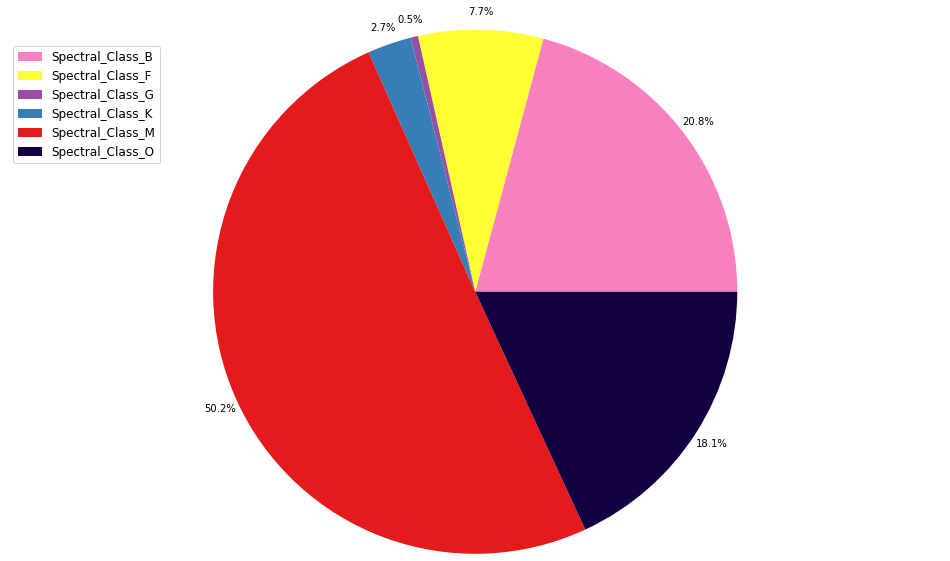

In [12]:
PieLabel = 'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G', 'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O' 
Piecolors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#120042'] 


fig2 = plt.figure(figsize=(13, 7))
ax3 = fig2.add_axes([0,0,1,1])
ax3.axis('equal')
ax3.pie(Spec_sum, labels=PieLabel, colors=Piecolors, labeldistance=None, radius=1.3, autopct='%1.1f%%', pctdistance=1.07)
ax3.legend(loc='upper left', fontsize='large')
plt.show()

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [14]:
X = data[['Temperature','L','R','A_M']]
y = data.Type

In [15]:
X

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(clf.fit(X_train, y_train))

DecisionTreeClassifier()


In [17]:
clf.feature_importances_

array([0.1986675 , 0.20550776, 0.20033573, 0.39548901])

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif, k=2)
select.fit(X, y)

SelectKBest(k=2)

In [19]:
mask = select.get_support()
print(mask)

[False False  True  True]


In [20]:
new_X = data.iloc[:, 2:4]
new_Y = data.Type
df_new = pd.DataFrame(new_X)
df_new.head()

,R,A_M
0,0.1700,16.12
1,0.1542,16.60
2,0.1020,18.70
3,0.1600,16.65
4,0.1030,20.06


In [21]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(df_new)
clusters = kmeans.cluster_centers_
clusters

array([[  11.20983765,    7.189725  ],
       [1588.36111111,   -9.77666667],
       [1185.7       ,   -9.55409091]])

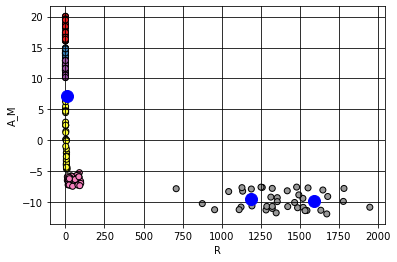

In [22]:
plt.rc('grid', linestyle="-", color='black')
plt.scatter(df_new.iloc[:, 0], df_new.iloc[:, 1], c=new_Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('R')
plt.ylabel('A_M')

plt.plot(clusters[0][0],clusters[0][1],'bo',markersize=12) 
plt.plot(clusters[1][0],clusters[1][1],'bo',markersize=12) 
plt.plot(clusters[2][0],clusters[2][1],'bo',markersize=12)

 


plt.xlabel('R')
plt.ylabel('A_M')
plt.grid(True)
plt.show()

In [23]:
X_arr = df_new.to_numpy() 
X_arr

array([[ 1.7000e-01,  1.6120e+01],
       [ 1.5420e-01,  1.6600e+01],
       [ 1.0200e-01,  1.8700e+01],
       [ 1.6000e-01,  1.6650e+01],
       [ 1.0300e-01,  2.0060e+01],
       [ 1.1000e-01,  1.6980e+01],
       [ 1.2700e-01,  1.7220e+01],
       [ 9.6000e-02,  1.7400e+01],
       [ 1.1000e-01,  1.7450e+01],
       [ 1.3000e-01,  1.6050e+01],
       [ 5.1000e-01,  1.0690e+01],
       [ 3.7610e-01,  1.1790e+01],
       [ 1.9600e-01,  1.3210e+01],
       [ 3.9300e-01,  1.0480e+01],
       [ 1.4000e-01,  1.1782e+01],
       [ 2.4000e-01,  1.3070e+01],
       [ 1.6000e-01,  1.4790e+01],
       [ 4.7000e-01,  1.0800e+01],
       [ 1.9670e-01,  1.3530e+01],
       [ 3.5100e-01,  1.1180e+01],
       [ 8.4000e-03,  1.0580e+01],
       [ 1.2340e-02,  1.4020e+01],
       [ 1.1000e-02,  1.4230e+01],
       [ 1.0000e-02,  1.4500e+01],
       [ 1.4000e-02,  1.1890e+01],
       [ 9.8400e-03,  1.2230e+01],
       [ 9.7000e-03,  1.4200e+01],
       [ 1.2800e-02,  1.4470e+01],
       [ 1.1000e-02,

In [24]:
Y_arr = new_Y.to_numpy()
Y_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [25]:
pairs = {}
predicted = []
for i in range(len(X_arr)):
    predicted_class = kmeans.predict([X_arr[i]])[0]
    original_class = Y_arr[i]
   #print([X[i]], predicted_class, original_class)
    predicted.append((X_arr[i], predicted_class))
    pair = (predicted_class, original_class)
    pairs[pair] = pairs.get(pair, 0)
    pairs[pair] += 1
    

for pair in pairs:
    print(pair, pairs[pair])

(0, 0) 40
(0, 1) 40
(0, 2) 40
(0, 3) 40
(0, 4) 40
(1, 5) 18
(2, 5) 22


In [26]:
clusters

array([[  11.20983765,    7.189725  ],
       [1588.36111111,   -9.77666667],
       [1185.7       ,   -9.55409091]])

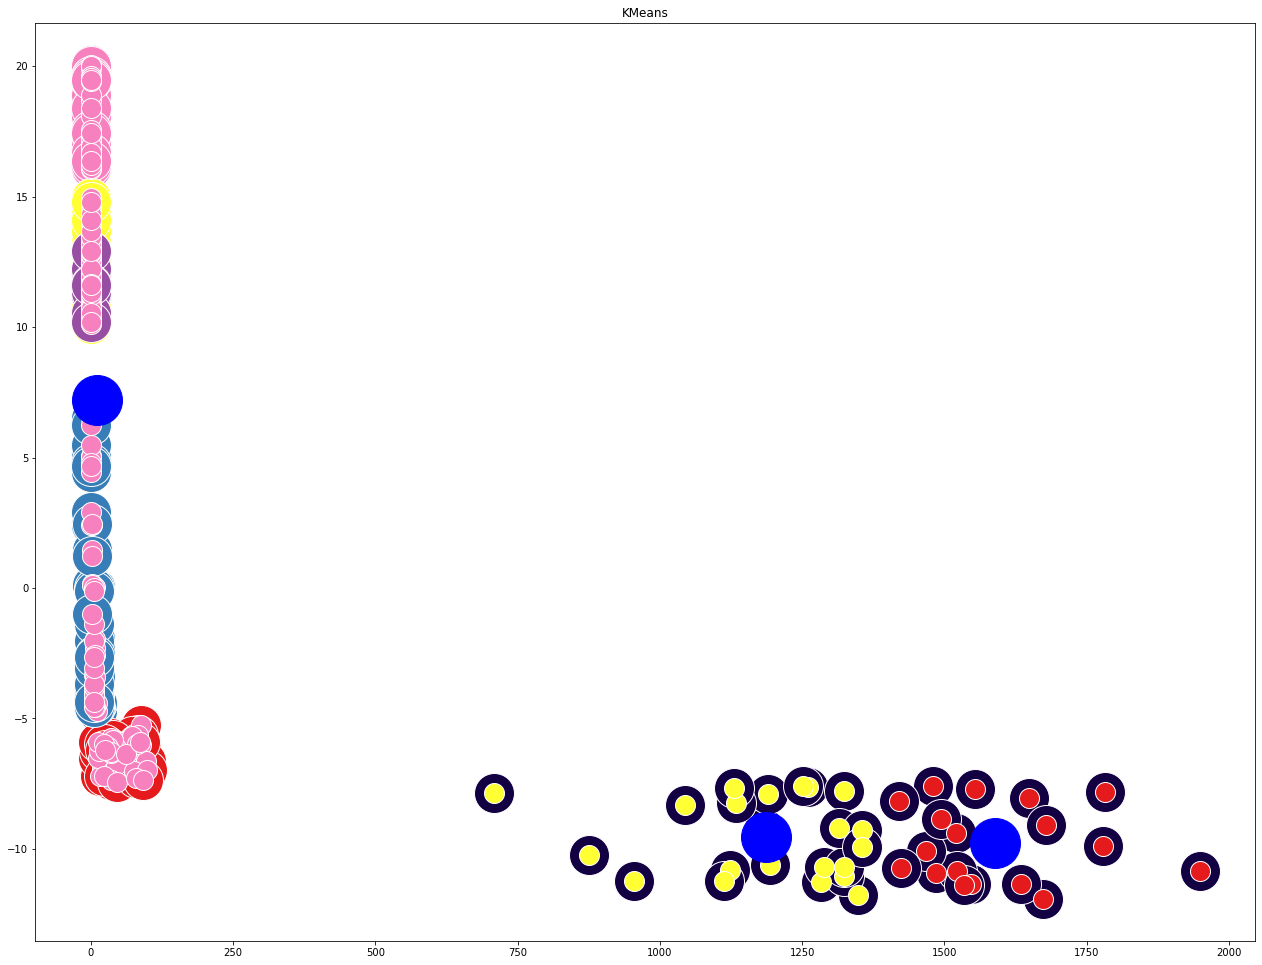

In [27]:
fig = plt.figure(figsize=(60, 15))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors=['#F781BF','#FFFF33','#984EA3','#377EB8','#E41A1C','#120042'] 
ax = fig.add_subplot(1, 3, 1)
ax.set_title('KMeans')

for i in range(len(X_arr)):
    c = colors[Y_arr[i]] 
    # plot original data
    ax.plot(X_arr[i][0], X_arr[i][1], 'w',
            markerfacecolor=c, marker='o', markersize=40)  # original data
    # plot estimate data

for elem in predicted:
    x_elem, y_elem = elem[0]

    if elem[1] == 0:
        c = colors[0]
    elif elem[1] == 1:
        c = colors[4]
    elif elem[1] == 2:
        c = colors[1]
    elif elem[1] == 3:
        c = colors[3]
    elif elem[1] == 4:
        c = colors[2]
    elif elem[1] == 5:
        c = colors[5]
    else:
        c = "gray"
    
    ax.plot(x_elem, y_elem, 'w',
           markerfacecolor=c, marker='o', markersize=20)   # predicted data
    
# cluster centers
ax.plot(clusters[0][0],clusters[0][1],'bo',markersize=50) 
ax.plot(clusters[1][0],clusters[1][1],'bo',markersize=50) 
ax.plot(clusters[2][0],clusters[2][1],'bo',markersize=50) 